In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model_finetune = torch.load(r'Pretrained Models\resnet50_shrinked_CIFAR100_4.pth')
model_fresh = torch.load(r"Pretrained Models\resnet18_CIFAR100_4.pth")

C:\Users\revai\AppData\Local\Temp\ipykernel_22728\3654277056.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_finetune = torch.load(r'D:\Mini Project\Pretrained Mod

In [3]:
model_finetune.to(device)
model_finetune.eval() 
model_fresh.to(device)
model_fresh.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
CIFAR100_CLASSES = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [5]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),              
    transforms.ToTensor(),                      
    transforms.Normalize(                      
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

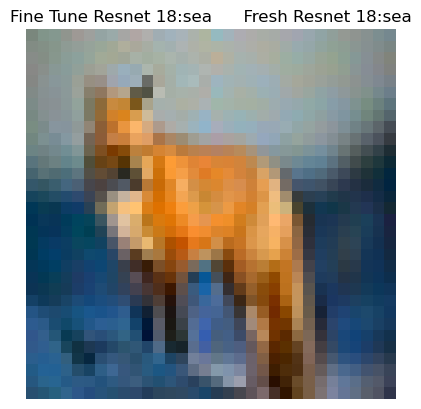

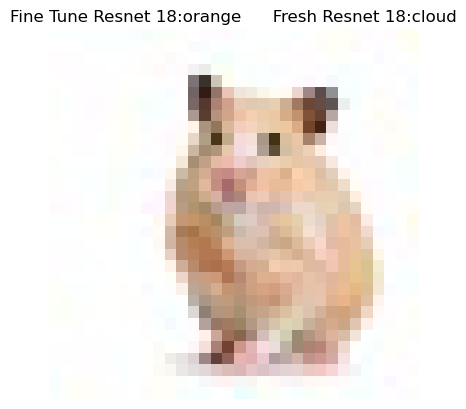

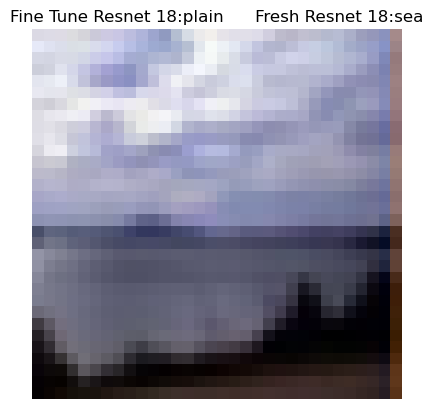

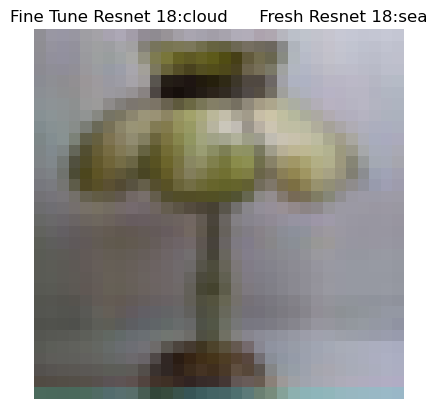

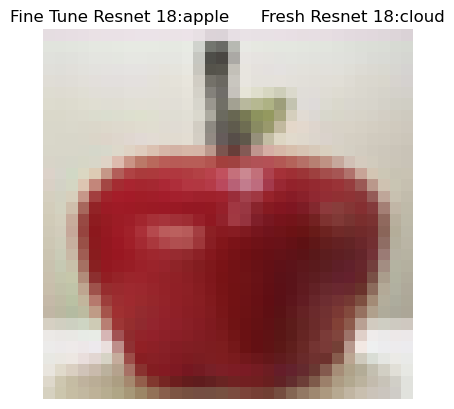

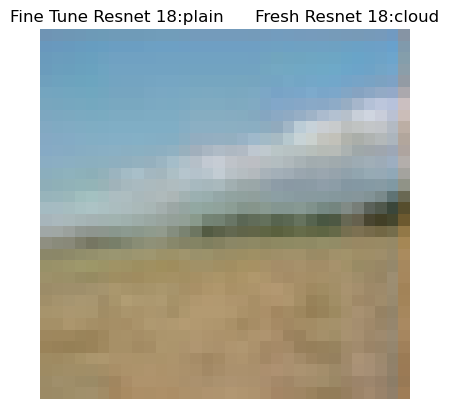

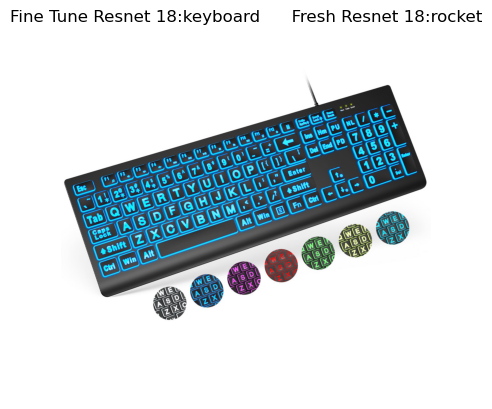

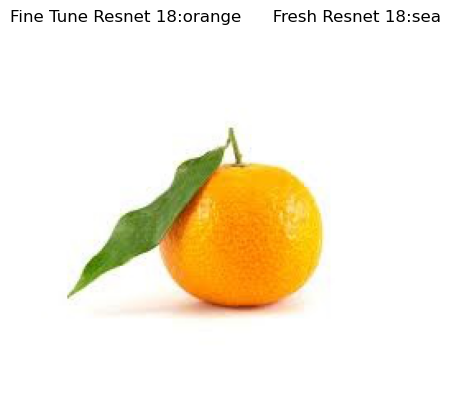

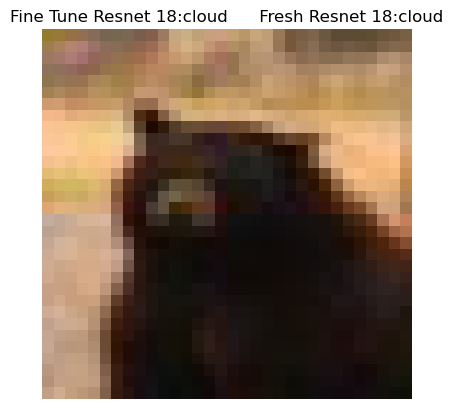

In [ ]:
def infer_from_folder(folder_path):
    for image_name in os.listdir(folder_path):
        if image_name.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(folder_path, image_name)
            
            image = Image.open(image_path).convert('RGB')
            input_tensor = preprocess(image).unsqueeze(0).to(device)
            
            with torch.no_grad():
                output_finetune = model_finetune(input_tensor)
                output_fresh = model_fresh(input_tensor)
            
            _, predicted_class_fresh = output_fresh.max(1)
            _, predicted_class_finetune = output_finetune.max(1)
            predicted_label_finetune = CIFAR100_CLASSES[predicted_class_finetune.item()]
            predicted_label_fresh = CIFAR100_CLASSES[predicted_class_fresh.item()]

            plt.figure()
            plt.imshow(image)
            plt.title(f"Fine Tune Resnet 18:{predicted_label_finetune}      Fresh Resnet 18:{predicted_label_fresh}")
            plt.axis("off")
            plt.show()

# Path to the folder containing test images
test_folder = "image Folder"  # Replace with the path to your folder
infer_from_folder(test_folder)
